In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
df=pd.read_csv("/data/binaryclassification_modelinput.csv",encoding= 'unicode_escape')
df.head()

,Unnamed: 0,Air temperature [Â°C],Process temperature [Â°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [Â°C]
0,0,25.95,36.45,1551,42.8,0,0,10.5
1,1,26.05,36.55,1408,46.3,3,0,10.5
2,2,25.95,36.35,1498,49.4,5,0,10.4
3,3,26.05,36.45,1433,39.5,7,0,10.4
4,4,26.05,36.55,1408,40.0,9,0,10.5


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
X = df.drop(columns="Target" , axis=1)
y = df["Target"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

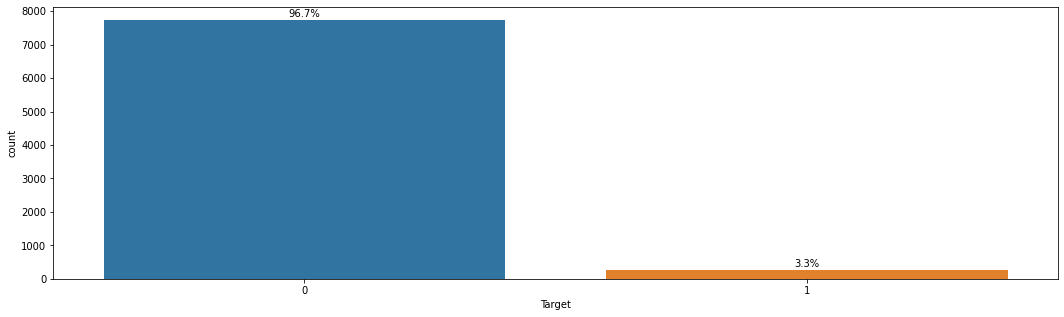

In [8]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

# Logistics Regression

Training Accuracy    : 96.99 %
Model Accuracy Score : 96.35 %
F1 Score             : 17.98 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1923
           1       0.67      0.10      0.18        77

    accuracy                           0.96      2000
   macro avg       0.82      0.55      0.58      2000
weighted avg       0.95      0.96      0.95      2000

--------------------------------------------------------


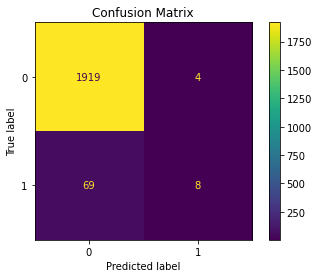

In [9]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
log_f1score = round(f1_score(y_pred_lr, y_test)*100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("F1 Score             :",log_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

# Decision Tree

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.3 %
F1 Score             : 77.63 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1923
           1       0.79      0.77      0.78        77

    accuracy                           0.98      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


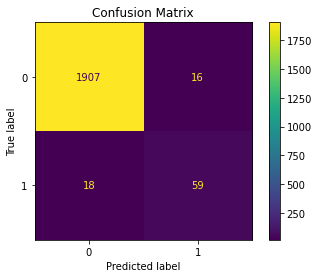

In [10]:
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)
decision_f1score = round(f1_score(y_pred_dec, y_test)*100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("F1 Score             :",decision_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

# Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.75 %
F1 Score             : 81.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1923
           1       0.93      0.73      0.82        77

    accuracy                           0.99      2000
   macro avg       0.96      0.86      0.91      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------


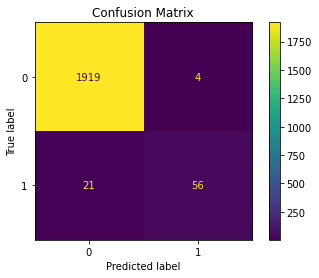

In [11]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
random_forest_f1score = round(f1_score(y_pred_rf, y_test)*100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("F1 Score             :",random_forest_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

# Support Vector Machine 

Training Accuracy    : 96.72 %
Model Accuracy Score : 96.15 %
F1 Score             : 0.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1923
           1       0.00      0.00      0.00        77

    accuracy                           0.96      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


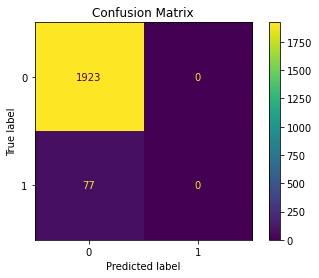

In [12]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_f1score = round(f1_score(y_pred_svc, y_test)*100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("F1 Score             :",svc_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

# Model building

In [13]:
models = pd.DataFrame({
    'Model': [
         'Logistic Regression','Support Vector Machines','Decision Tree', 'Random Forest'],
    
    'Training Accuracy': [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy],
    
    'Model F1 Score': [log_f1score , svc_f1score, decision_f1score, random_forest_f1score]
})

In [14]:
pd.set_option('precision',2)
models.sort_values(by='Model F1 Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score,Model F1 Score
Random Forest,100.00,98.75,81.75
Decision Tree,100.00,98.30,77.63
Logistic Regression,96.99,96.35,17.98
Support Vector Machines,96.72,96.15,0.00


In [15]:
X_test.columns

Index(['Air temperature [Â°C]', 'Process temperature [Â°C]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Temperature difference [Â°C]'],
      dtype='object')

In [16]:
#X_train.columns=cols
#X_test.columns=cols

In [17]:
X_train.head()

,Air temperature [Â°C],Process temperature [Â°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [Â°C]
5504,30.65,40.05,1458,51.0,42,9.4
5307,31.85,41.15,1530,34.8,211,9.3
1684,25.65,35.15,1438,44.5,3,9.5
2441,26.95,36.35,1676,31.0,69,9.4
0,25.95,36.45,1551,42.8,0,10.5


In [18]:
X_test.head()

,Air temperature [Â°C],Process temperature [Â°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [Â°C]
3644,30.05,39.35,1548,32.4,81,9.3
1828,25.65,35.05,1351,56.3,174,9.4
6661,29.15,38.25,1501,39.8,187,9.1
9216,25.55,36.65,1469,43.7,96,11.1
5911,28.65,38.25,1288,64.0,3,9.6


In [19]:
#Final Model Random Forest Classifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    ax.set_facecolor("k")
    return predictions,prediction_probabilities,algorithm

RandomForestClassifier()
Accuracy score :  0.986
Recall score   :  0.9152542372881356
classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1941
           1       0.70      0.92      0.79        59

    accuracy                           0.99      2000
   macro avg       0.85      0.95      0.89      2000
weighted avg       0.99      0.99      0.99      2000



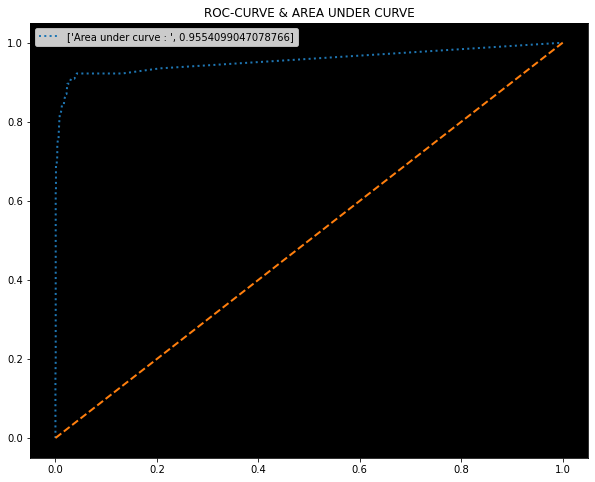

In [20]:
rfc =  RandomForestClassifier(n_estimators=100)
#cols = ['Air temperature [C]','Process temperature [C]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]',
#        'Temperature difference [C]']

y_pred,y_prob,model_obj=model(rfc,X_train,y_train,X_test,y_test,X_train.columns)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
y_prob

array([0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ])

In [23]:
from mosaicml import *
from mosaicml.constants import MLModelFlavours

In [24]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    data = pd.DataFrame(eval(payload))
    prediction = pd.Series(model.predict(data))[0]
    return "No failure" if prediction == 0 else "Failure"

In [25]:
import requests
req = requests.Request()
req.json = {"payload":X_train.head(1).to_json()}

In [26]:
req.json

{'payload': '{"Air temperature [\\u00c2\\u00b0C]":{"5504":30.65},"Process temperature [\\u00c2\\u00b0C]":{"5504":40.05},"Rotational speed [rpm]":{"5504":1458},"Torque [Nm]":{"5504":51.0},"Tool wear [min]":{"5504":42},"Temperature difference [\\u00c2\\u00b0C]":{"5504":9.4}}'}

In [27]:
sch = generate_schema(score,(model_obj, req),X_train)
print(sch)

{'input': {'type': 'pd.core.frame.DataFrame', 'items': {'type': 'object', 'properties': {'Air temperature [Â°C]': {'type': 'number', 'format': 'double'}, 'Process temperature [Â°C]': {'type': 'number', 'format': 'double'}, 'Rotational speed [rpm]': {'type': 'integer', 'format': 'int64'}, 'Torque [Nm]': {'type': 'number', 'format': 'double'}, 'Tool wear [min]': {'type': 'integer', 'format': 'int64'}, 'Temperature difference [Â°C]': {'type': 'number', 'format': 'double'}}}, 'example': [{'Air temperature [Â°C]': 30.650000000000034, 'Process temperature [Â°C]': 40.05000000000001, 'Rotational speed [rpm]': 1458, 'Torque [Nm]': 51.0, 'Tool wear [min]': 42, 'Temperature difference [Â°C]': 9.399999999999975}, {'Air temperature [Â°C]': 31.850000000000023, 'Process temperature [Â°C]': 41.150000000000034, 'Rotational speed [rpm]': 1530, 'Torque [Nm]': 34.8, 'Tool wear [min]': 211, 'Temperature difference [Â°C]': 9.300000000000011}]}, 'output': {'type': 'string', 'example': 'No failure'}}


In [28]:
tmp = register_model(model_obj, 
               score, 
               name="Predictive_Maintenance_Binary_Classification", 
               description="Predictive Maintenance Binary Classification",
               flavour=MLModelFlavours.sklearn,
               model_type="classification",
               init_script="pip install scikit-learn==0.24.2 && pip install pandas==1.3.5",
               schema=sch,
               y_true=y_test,
               y_pred=y_pred, 
               prob=y_prob, 
               features=X_train.columns,
               labels=[0,1], 
               init_script="" ,
               input_type="json", 
               explain_ai=True, 
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train.tolist(),
               y_test=y_test.tolist(),
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               target_names=['No Failure',' or Failure'],
               kyd=True, kyd_score = True)
#print("Registering model")

SyntaxError: keyword argument repeated (<ipython-input-28-21847f6119de>, line 14)

# Sample  Payloads

### Failure
{"payload":"{'Air temperature [°C]':{'0':31.0}, 'Process temperature [°C]':{'0':38.7}, 'Rotational speed [rpm]':{'0':1365}, 'Torque [Nm]':{'0':56.2}, 'Tool wear [min]':{'0':146.0} , 'Temperature difference [°C]':{'0':6.7} }"}


### No Failure
{"payload":"{'Air temperature [°C]':{'0':25.95}, 'Process temperature [°C]':{'0':36.45}, 'Rotational speed [rpm]':{'0':1551}, 'Torque [Nm]':{'0':42.8}, 'Tool wear [min]':{'0':0.0} , 'Temperature difference [°C]':{'0':10.5}}"}